## Introduction to RNA secondary prediction with recurrent neural networks

RNA molecules play critical roles in biological systems, with their structure often being key to their function. Predicting RNA secondary structures—the patterns of base pairings and loops within an RNA sequence—provides insights into the roles of functional non-coding RNAs (ncRNAs). However, accurately predicting these structures is a difficult problem, since it involves capturing the interaction between sequence composition and thermodynamic stability.

Machine learning models, particularly those based on recurrent neural networks (RNNs) and deep learning, have demonstrated remarkable success in predicting RNA secondary structures with high accuracy. Despite these advancements, the risk of overfitting remains a significant concern, especially given the high number of parameters of these models and the limited amount of available data.

This lecture will explore a novel approach that integrates machine learning with thermodynamic principles to enhance prediction robustness. We will discuss how RNA folding scores, learned using deep neural networks, can be regularized by incorporating Turner’s nearest-neighbor free energy parameters. This integration leverages the strengths of both computational and thermodynamic methods, ensuring that the predicted folding scores remain biologically meaningful while minimizing overfitting.

Using the MXfold2 algorithm, which achieves state-of-the-art performance, we want to illustrate how combining machine learning with thermodynamic regularization leads to robust, accurate, and computationally efficient RNA secondary structure predictions. This approach shows the potential of hybrid methods in addressing the difficulties of RNA folding.

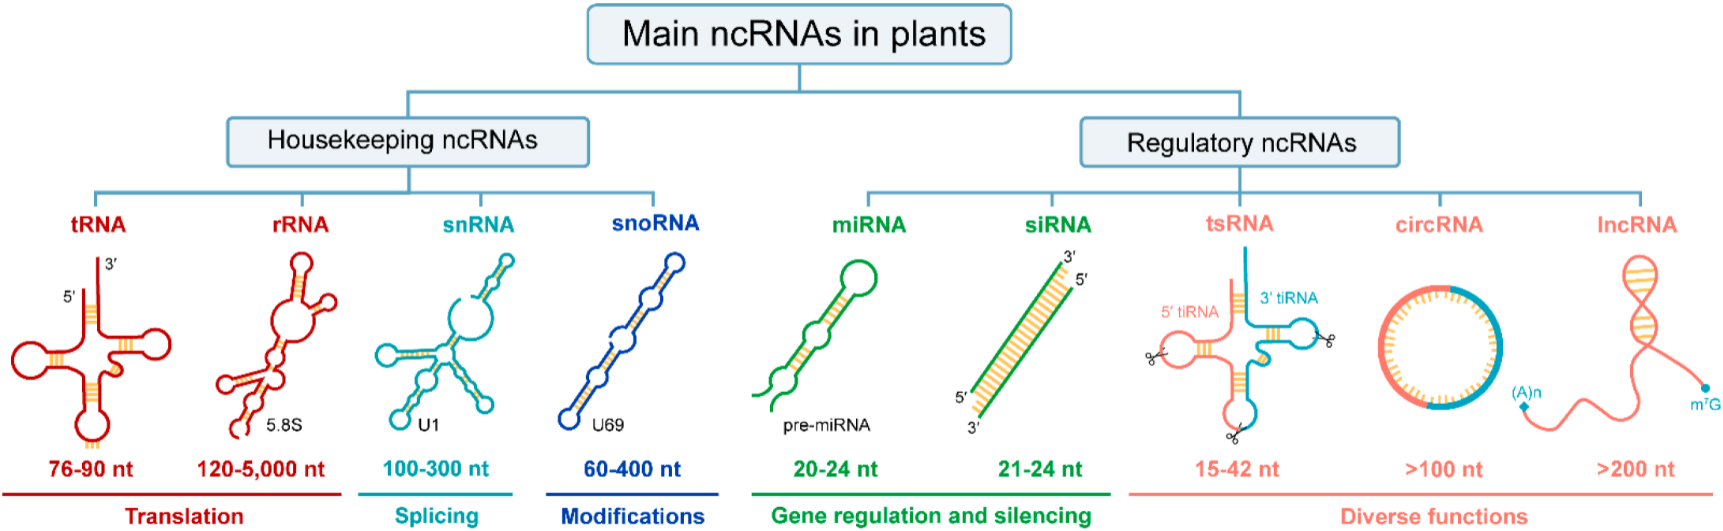

Figure: ncRNAs category in plants. From top to bottom, there are primary classification, secondary classification, abbreviations, secondary structures, size, and functions of ncRNAs. Since some ncRNAs contain multiple types, one is selected and annotated with text in the lower right corner of the secondary structure. The sizes of ncRNAs are approximate. Diverse functions include gene expression regulation, translation inhibition, plant immunity, stress response, etc. Abbreviations: tRNA, transfer RNA; rRNA, ribosomal RNA; snRNA, small nuclear RNA; snoRNA, small nucleolar RNA; miRNA, micro RNA; siRNA, small interfering RNA; tsRNA, tRNA-derived small RNA; circRNA, circular RNA; lncRNA, long non-coding RNA; tiRNA, stress-induced tRNA or tRNA halves; nt, nucleotides

## What is this lecture based on?

This lecture is based on the paper "RNA secondary structure prediction using deep learning with thermodynamic integration". The code presented in this notebook can also be found in the coresponding github repository. MXfold1 was described in: A max-margin training of RNA secondary structure prediction integrated with the thermodynamic model.

## What is the structure of MXfold?

MXfold consists of a thermodynamic model, a machine learning component and combines both for the final output. 

**Thermodynamic Modeling**

MXfold utilizes well-established thermodynamic principles for RNA secondary structure prediction:

1. Nearest-neighbor thermodynamic parameters: Predicts RNA folding by minimizing the free energy of the structure.


to allow for evidence support rna secondary structure prediction. These predictions are not used alone, but integtated with Machine Learning predictions. 

**Machine Learning Component**

The unique feature of MXfold is its integration of deep learning with traditional thermodynamic principles. It incorporates:

1. Supervised learning using known RNA structures from databases such as RNAcentral or PDB.
2. Predicts structural probabilities instead of relying solely on MFE structures, based on 4 different types of predictions.

**Base Pairing Probability Estimation**

The algorithm calculates the base-pairing probabilities using:

1. Partition function approaches, which estimate the likelihood of base pairing across all possible structures.
2. Probabilities are refined by leveraging neural networks to predict base-pair confidence based on sequence features.

**Integration and Output**

The final structure prediction integrates the thermodynamic model's MFE structure with the probabilistic model's confidence scores.

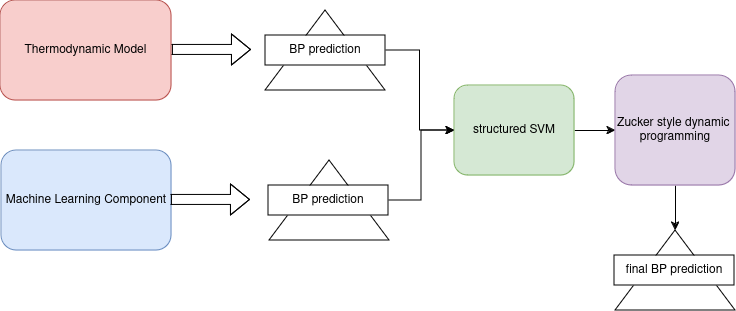



### In this lecture, we will focus on:

- Set up the Mxfold project
- Nature of data
- Method
  - Deep learning architecture
- Train the model
- Prediction RNA secondary structures
- Visualize the predictions



### RNA secondary structure prediction using deep learning with thermodynamic integration

Accurate predictions of RNA secondary structures can help uncover the roles of functional non-coding RNAs. Although machine learning-based models have achieved high performance in terms of prediction accuracy, overfitting is a common risk for such highly parameterized models. Here we show that overfitting can be minimized when RNA folding scores learnt using a deep neural network are integrated together with Turner’s nearest-neighbor free energy parameters. Training the model with thermodynamic regularization ensures that folding scores and the calculated free energy are as close as possible. In computational experiments designed for newly discovered non-coding RNAs, our algorithm (MXfold2) achieves the most robust and accurate predictions of RNA secondary structures without sacrificing computational efficiency compared to several other algorithms. The results suggest that integrating thermodynamic information could help improve the robustness of deep learning-based predictions of RNA secondary structure.

[Link to the paper](https://doi.org/10.1038/s41467-021-21194-4)

In [2]:
import warnings
from IPython.display import Image, display
warnings.filterwarnings(action='ignore')

## RNA secondary structure


RNA secondary structure refers to the two-dimensional arrangement of interactions between nucleotide bases within an RNA molecule, primarily through hydrogen bonding. These interactions form structural elements such as stems (paired bases), loops (unpaired bases forming hairpins, bulges, or junctions), and internal loops. Unlike DNA, which primarily exists as a double helix, RNA is single-stranded, allowing it to fold back on itself to form these intricate patterns.

The secondary structure is crucial because it often determines the RNA's function, such as in catalysis (as in ribozymes), molecular recognition, or gene regulation (e.g., in riboswitches). Predicting secondary structure helps uncover the biological roles of RNA molecules, particularly non-coding RNAs, which do not encode proteins but perform regulatory or structural roles in the cell.

The secondary structure serves as a blueprint for understanding higher-order RNA folding (tertiary structure) and its interactions with other molecules, making it a foundational concept in RNA biology and computational biophysics.


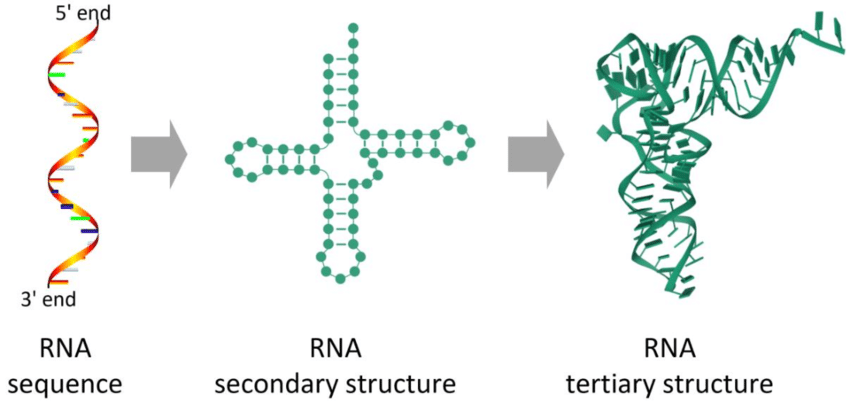



### Importance of RNA structure for ncRNAs

The structure of non-coding RNAs (ncRNAs) is critical to their function, as it determines how they interact with other molecules and carry out their biological roles. Convolutions, when applied in computational models predicting ncRNA structures, are particularly important due to their ability to capture localized patterns, such as base-pairing interactions or motifs, within RNA sequences. Their translation-invariance ensures that these features are identified regardless of their position in the sequence, while parameter sharing makes the analysis computationally efficient. By extracting hierarchical features, convolutions can help identify both simple and complex structural elements, providing deeper insights into the functional mechanisms of ncRNAs. These properties make convolution-based methods well-suited for uncovering the critical structural features that underpin ncRNA functionality.

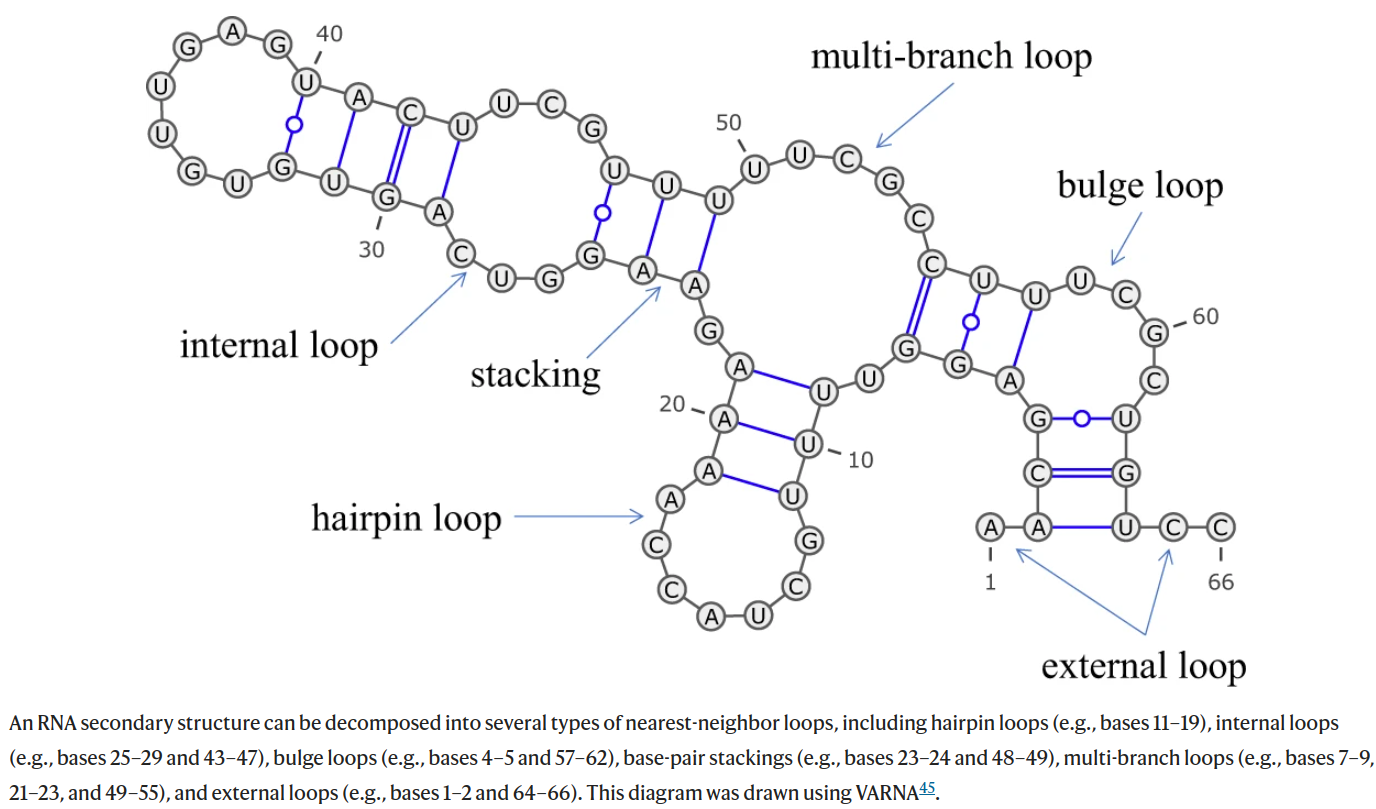

In [58]:
display(Image("figures/rnastructure1.png"))

#### Secondary structure elements

**Internal Loop**: An internal loop occurs when a region of an RNA strand contains unpaired nucleotides on both sides of a paired stem. These loops are formed when two segments of the RNA sequence align to form a base-paired stem but leave gaps on each strand due to mismatched bases. Internal loops can vary in size and play important roles in RNA flexibility, recognition, and interactions with proteins or other molecules.

**Hairpin Loop**: A hairpin loop is a common RNA secondary structure element that forms when a single strand folds back on itself, creating a stem of paired bases with a terminal loop of unpaired nucleotides. Hairpin loops are highly stable and often serve as recognition sites for other biomolecules or as intermediates in RNA folding pathways. They are critical in many biological processes, such as transcription termination and riboswitch function.

**Stacking**: Stacking refers to the stabilizing interactions between adjacent base pairs in the RNA helix. These interactions arise from the overlap of pi-electrons in the aromatic nucleotide bases, providing structural stability to the RNA molecule. Base stacking contributes significantly to the thermodynamic stability of RNA stems and is a key feature of both DNA and RNA secondary structures.

**Bulge Loop**: A bulge loop forms when one strand of an RNA stem contains unpaired nucleotides that protrude from the structure while the other strand remains fully paired. Bulges can be single or multiple nucleotides long and introduce asymmetry into the RNA molecule. They often act as flexible hinges, facilitating molecular recognition and interactions with proteins or other RNAs.

**Multi-Branch Loop**: Multi-branch loops, also called junctions, occur when three or more helices converge at a single unpaired region. These loops are complex and highly variable in structure, often serving as flexible hubs in RNA folding and interactions. They are critical elements in larger RNA structures like ribozymes and ribosomal RNA, where they mediate the spatial arrangement of multiple helices.

**External Loop**: An external loop is the unpaired region at the end of an RNA molecule, typically beyond the paired regions of the secondary structure. It serves as the "open" end of the RNA and often participates in interactions with other RNA molecules, proteins, or ligands. External loops can influence the overall folding and stability of the RNA molecule and are often involved in regulatory or catalytic functions.



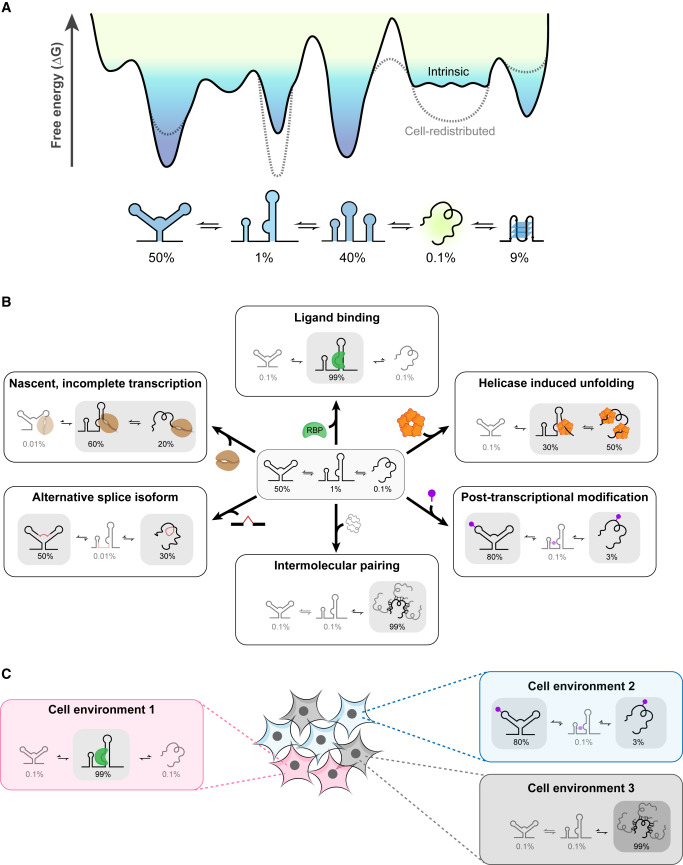


Figure 1. Causes of RNA secondary structure heterogeneity
(A) Representative RNA free energy landscape. Biologically accessible alternative states occur as local minima in the energy landscape. The relative population of each state is determined by its energy, and the rate of exchange is controlled by the height of the energy barrier. Cells can redistribute RNA ensembles by stabilizing or destabilizing certain states (dashed line).
(B) Cellular processes that redistribute RNA structural ensembles. During transcription of nascent RNA or after alternative splicing, the unavailability of downstream sequences effectively shifts the ensemble toward different states. Ligand binding, intermolecular pairing, helicases, and post-transcriptional modifications are examples of additional factors that can stabilize different structured or unstructured states.
(C) Differences in cell environments, including changes in RBP expression, changes in RNA localization, and post-transcriptional modifications drive redistribution of RNA structural ensembles across cell populations.

## Standard algroithms for the prediciton of RNA secondary structures

The most widely used method for predicting RNA secondary structures relies on thermodynamic models, such as Turner’s nearest-neighbor model. In this approach, the secondary structure is broken down into characteristic substructures, referred to as nearest-neighbor loops, which include hairpin loops, internal loops, bulge loops, base-pair stackings, multi-branch loops, and external loops. Each of these loops has an associated free energy, determined by summing pre-characterized free energy parameters derived from experimental techniques like optical melting. The total free energy of the entire RNA secondary structure is computed by summing the free energies of its individual nearest-neighbor loops. Dynamic programming techniques, such as the Zuker algorithm, are used to efficiently identify the secondary structure with the minimum free energy. Well-known tools like RNAfold are built upon this approach.


### Overview over nearest-neighbor thermodynamic model (Taylor's model)

MXfold relies on the nearest-neighbor thermodynamic model to build secondary structure information to be integrated with MXfold ML prediction. Here we only present a very basic overview over the core ideas of taylor's model and Zucker's dynamic programming algorithm to solve them.

The core of Taylor's model consists of the idea that RNA structure prediction can be broken down to the assumption that the stability of an RNA structure stems from adjacent base pairs (nearest neighbors). The change in the free energy $\Delta G$ of any secondary RNA structure can then be calculated as the sum of the individual thermodynamic contributions of each nearest-neighbor interaction in the structure. Usually additional penalties like terminal penalties, loop energetics, and dangling ends are applied. 

##### Stability of base pairs depend on neighbors

Typically the folding process forms complementary Watson-Crick (A-U and G-C) and wobble (G-U) base pairs. Each base pair contributes a specific free energy, dependent on it's neighborhood. This depends was experimentally comfirmed, e.g. a stack of a G-C pair on top of another G-C pair is more stable than a G-C stack on top of an A-U pair. In practice Taylor's Model simply uses a table to assign a value of $\Delta G$ to every possile base-pair. 

##### Influence of Loops

Loops in the structure include additional penalties, hairpins contribute to instability depending on their size, bulges and internal loops can cause disruptions in a stem. Multiloop are also penalized depending on their size and complexity. 

The total free energy change is calculated as:

\begin{equation}
\Delta G = \Delta H - T \Delta S
\end{equation}

$\Delta H$ here stands for enthalpy change, representing the total heat content or bond energy. Here it is associated with the cost of creating/breaking bonds. The formation of BP contributes negatively to $\Delta H$, while loop formation increases $\Delta H$

This is reduced by the change in entropy $\Delta S$. A decrease in disorder is here favorable for stable RNA folding. Forming BP can for example decrease the disorder. 

The interplay here is moderated by the temperature $T$. When the temperature is low $\Delta H$ is the defnining term, when the temperature is high $\Delta S$ is. 

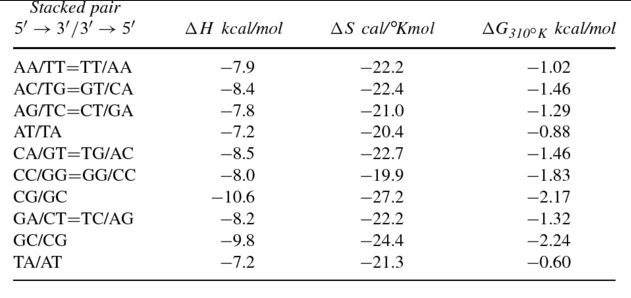

##### Final prediction of secondary RNA structures

If the search-space is sufficiently small all possible RNA secondary structures can be created and the MFE (minimum free energy) structure can be used. When the search-space is much larger usually dynamic programming approaches a employed:

**Zuker Algorithm (Minimizing Free Energy)**

Since the nearest-neighbor thermodynamic model calculates the changes to the free energy based on neighbors a dynamic programming approach that divides the sequence is appropriate. After optimizing the substructures, the final solution consists of the changes in the free energy in every substructure. 




## Machine learning approaches for RNA secondary structure prediction


An alternative approach leverages machine learning techniques to train scoring parameters for decomposed substructures using reference RNA structures, rather than relying on experimental data. This method has been successfully employed by tools such as CONTRAfold and ContextFold, enabling more accurate RNA secondary structure predictions. However, the large parameterization inherent to machine learning models increases the risk of overfitting to training data, which can hinder their ability to make robust predictions across diverse RNA sequences. Probabilistic generative models, such as stochastic context-free grammars (SCFGs), have also been utilized for RNA secondary structure prediction. Recently, the TORNADO algorithm combined SCFGs with the nearest-neighbor model, achieving prediction performance comparable to that of other machine learning-based approaches.


## Hybrid models

MXfold is based on the idea of combining the strenght of conventional prediction algorithms and deep learning methods to mitigate the weaknesses of both approaches. MXfold2 integrates folding scores, which
are calculated by a deep neural network, with Turner’s nearest-neighbor free energy parameters. The deep neural network is trained using the max-margin framework with thermodynamic regularization. This forces the model to maximize the similarity between the folding score and the free energy calculated by the thermodynamic
parameters. 


### Setting up the project

- Create a conda environment using `env.yml`
  - `conda env create -f environment.yml`
  - `conda activate rna_structure_mxfold`
- `git clone https://github.com/mxfold/mxfold2`
- `mkdir data`
- `wget https://zenodo.org/records/4430150/files/mxfold2-data.tar.gz?download=1`
- Extract this data into `data` folder
- `cd mxfold2`
- `python setup install`

#### Example commands:

- `mxfold2 predict ../../test.fa`

**input fasta**

$>$DS4440
GGAUGGAUGUCUGAGCGGUUGAAAGAGUCGGUCUUGAAAACCGAAGUAUUGAUAGGAAUACCGGGGGUUCGAAUCCCUCUCCAUCCG

In [59]:
%%bash
mxfold2 predict test.fa

>DS4440
GGAUGGAUGUCUGAGCGGUUGAAAGAGUCGGUCUUGAAAACCGAAGUAUUGAUAGGAAUACCGGGGGUUCGAAUCCCUCUCCAUCCG
(((((((........(((((..((((.....))))...)))))...................(((((.......)))))))))))). (24.8)


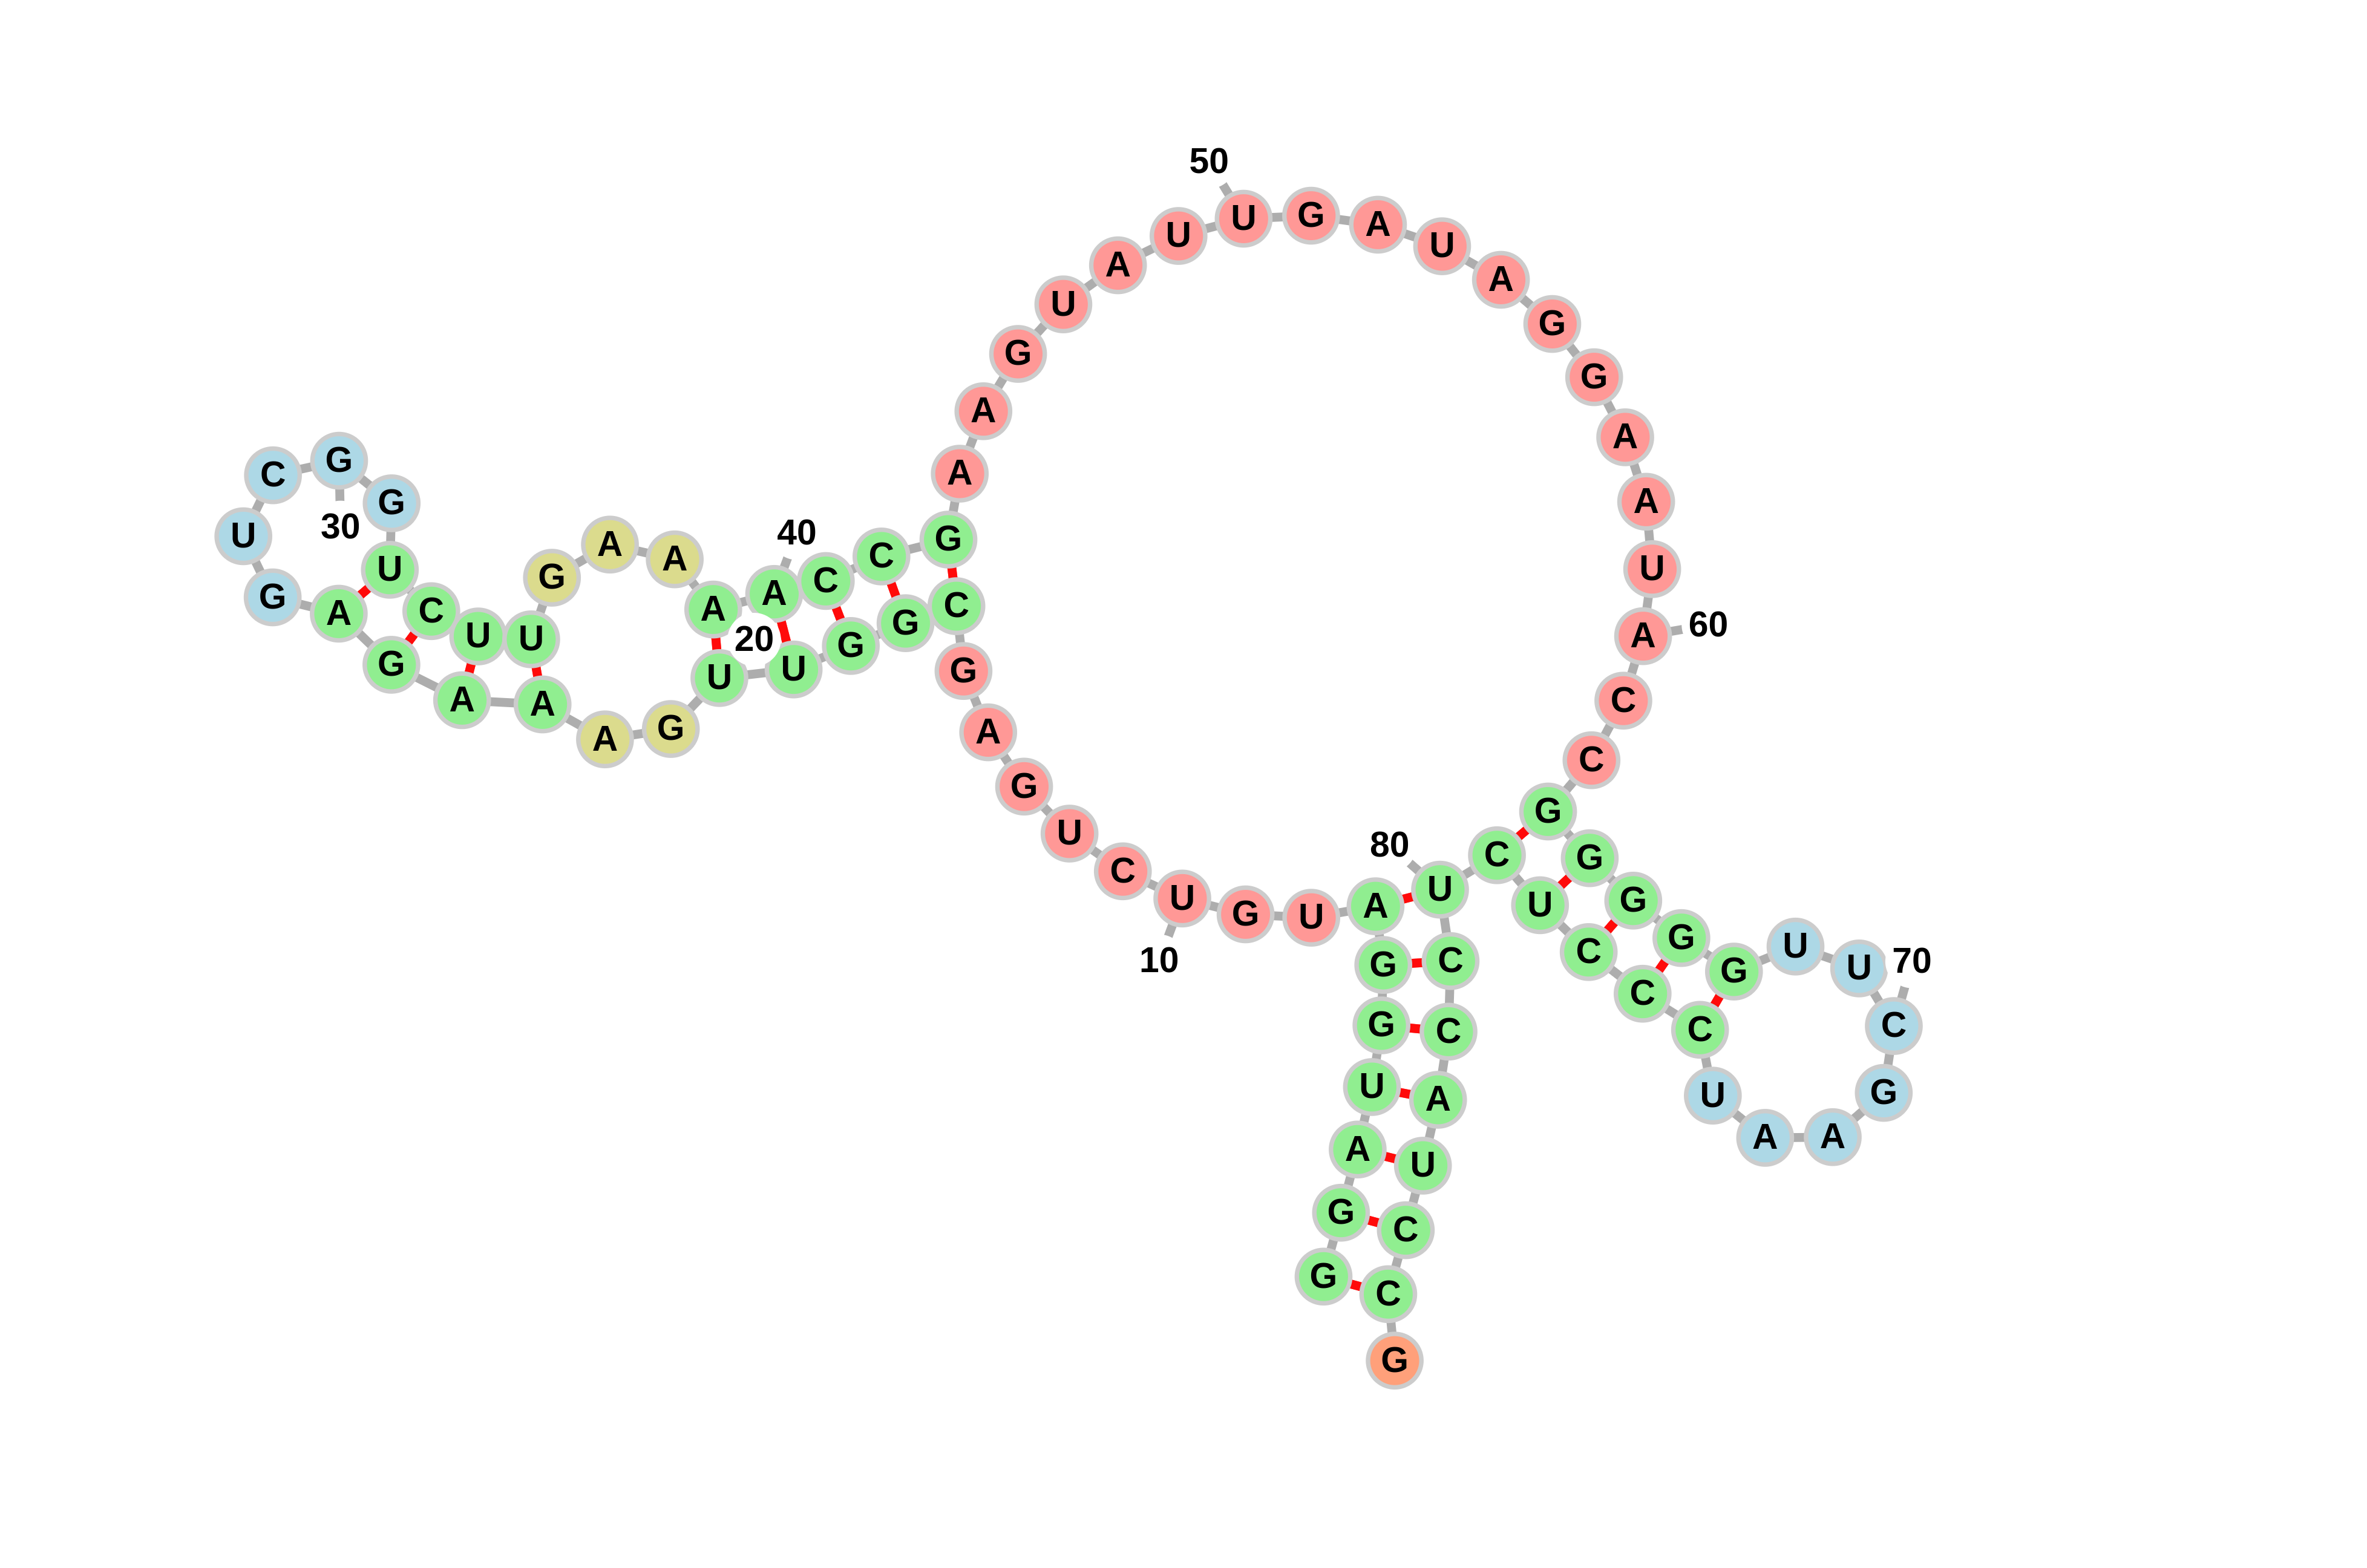

In [60]:
display(Image("figures/DS4440_rna_structure.png"))
# http://rna.tbi.univie.ac.at/forna/

In [61]:
import varnaapi
varnaapi.set_VARNA("VARNAv3-93.jar")

In [62]:
from varnaapi import Structure
v = Structure(structure="(((((((........(((((..((((.....))))...)))))...................(((((.......)))))))))))).")
v.show()

Output file: /tmp/tmp76parme2.svg



JupyterSvgImage(svg='<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" \n"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n\n<svg width="463.48737341824983px" height="353px" version="1.1" viewBox="0 0 500 400" \nxmlns="http://www.w3.org/2000/svg">\n<line x1="313.0398152003146" y1="335.3124074524272" x2="313.0398152003146" y2="325.3124074524272" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="313.0398152003146" y1="315.3124074524272" x2="313.0398152003146" y2="305.3124074524272" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="313.0398152003146" y1="295.3124074524272" x2="313.0398152003146" y2="285.3124074524272" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="313.0398152003146" y1="275.3124074524272" x2="313.0398152003146" y2="265.3124074524272" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="313.0398152003146" y1="255.31240745242718" x2="313.0398152003146" y2="245.3124074524272" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="313.0398152003146" y1="235.3124074524272" x2="313.0398152003146" y2="225.3124074524272" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="308.1986571175496" y1="219.06213211567973" x2="300.93698320506815" y2="217.18673543557532" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="291.5495038425064" y1="213.85536355592856" x2="284.7300812847528" y2="210.73374591474308" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="276.07361022144994" y1="205.805428137527" x2="269.9084392129812" y2="201.53463346261063" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="262.2520862649158" y1="195.1625798754478" x2="256.9328278213389" y2="189.87537737039892" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="250.51461142787903" y1="182.25768049340604" x2="246.20662908479935" y2="176.11843714828007" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="241.22607686175107" y1="167.49191369230357" x2="238.06329590201292" y2="160.6914844911666" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="234.67524178602488" y1="151.3243132698127" x2="232.75598581006906" y2="144.07410794736035" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="231.06575662693572" y1="134.25749281323655" x2="230.4496908977462" y2="126.78290361139565" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="230.5098319931527" y1="116.8220205967394" x2="231.21610858018144" y2="109.35541533721386" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="226.9850593139018" y1="102.67701916194926" x2="217.5812504679435" y2="99.27578715153334" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="208.17744162198528" y1="95.87455514111747" x2="198.77363277602706" y2="92.47332313070166" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="189.36982393006883" y1="89.07209112028579" x2="179.96601508411055" y2="85.67085910986987" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="170.56220623815233" y1="82.269627099454" x2="161.1583973921941" y2="78.86839508903819" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="151.82395383225162" y1="79.04915654316756" x2="145.4004403781206" y2="81.65788861537487" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="135.84298895184205" y1="82.67599384502319" x2="129.01406869547313" y2="81.47897410745873" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="120.37270527845283" y1="77.27085643808505" x2="115.21944631730298" y2="72.6328687063965" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="106.50299518959787" y1="69.28802326671183" x2="96.50299518959787" y2="69.28802326671183" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="86.50299518959787" y1="69.28802326671183" x2="76.50299518959787" y2="69.28802326671183" stroke="rgb(35%, 35%, 35%)" stroke-width="1.0" />\n<line x1="66.50299518959787" y1="69.28802326671183" x2="56.50299518959785" y2="69.28802326671183" strok

In [63]:
%%bash
java -cp VARNAv3-93.jar fr.orsay.lri.varna.applications.VARNAcmd -sequenceDBN "GGAUGGAUGUCUGAGCGGUUGAAAGAGUCGGUCUUGAAAACCGAAGUAUUGAUAGGAAUACCGGGGGUUCGAAUCCCUCUCCAUCCG" -structureDBN "(((((((........(((((..((((.....))))...)))))...................(((((.......))))))))))))." -o figures/varna_DS4440.png

Output file: figures/varna_DS4440.png



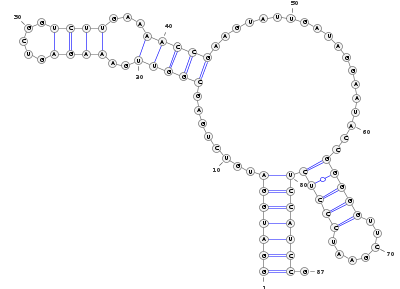

In [64]:
display(Image("figures/varna_DS4440.png"))

### Data representation as BPSEQ

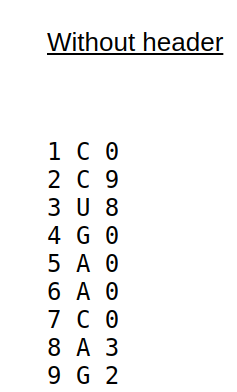

In [65]:
display(Image("figures/bpseq.png"))

The first column contains the sequence position, starting at one. The second column contains the base in one-letter notation. The third column contains the pairing partner of the base if the base is paired. If the base is unpaired, the third column is zero. https://www.ibi.vu.nl/programs/k2nwww/static/data_formats.html

### Datasets

The first dataset, which has been carefully established by Rivas et al, 2012, includes TrainSetA, TestSetA, TrainSetB, and TestSetB. TrainSetA and TestSetA were collected from different publications (see section "Datasets" in the [publication](https://doi.org/10.1038/s41467-021-21194-4)). TrainSetB and TestSetB, which contain 22 families with 3D structure annotations, were extracted from [Rfam 10.0](https://doi.org/10.1093/nar/gkq1129). The sequences in Train/TestSetB share less than 70% sequence identity with the sequences in TrainSetA. Several sequences were excluded that contained pseudoknotted secondary structures in the original data sources from all four sub-datasets since all algorithms evaluated in this study were designed for predicting RNA secondary structures without pseudoknots. It is important to note that literature-based TrainSetA and Rfam-based TestSetB are structurally dissimilar, whereas TrainSetA and TestSetA have some structural similarities.
Additionally the same dataset extracted from the bpRNA-1m dataset, which is based on Rfam 12.241 with 2588
families was used. To further confirm the robustness against "unseen" families, a dataset based on the recent Rfam database Rfam 14.242 was created. This included 1,500 additional RNA families. 

#### Rfam database

The Rfam database is a publicly available resource that catalogs RNA families and their conserved secondary structures. It focuses on functional RNA sequences, like ribosomal RNAs (rRNAs), transfer RNAs (tRNAs), small nuclear RNAs (snRNAs), and other non-coding RNAs (ncRNAs), including regulatory RNAs like riboswitches and microRNAs. Each RNA family in Rfam is represented by a multiple sequence alignment annotated with its consensus secondary structure, which captures conserved base-pairing interactions.

#### Architecture

- Convolutional layers
- BiLSTM

### Convolutional layer

Convolutions are operation in neural networks used, due to their ability to extract and represent localized patterns in data. One of their most important properties is spatial locality, as the convolutional filters operate on small, localized regions of the input, enabling the detection of features such as edges, corners, or textures in images or motifs in sequences. Another key property is parameter sharing, where the same filter (kernel) is applied across the entire input, drastically reducing the number of learnable parameters and improving computational efficiency. Additionally, convolutions are translation-invariant, meaning that features detected by the filters remain consistent regardless of their position in the input. This makes convolutions particularly effective for tasks where patterns may appear in various locations, such as image classification or time-series analysis. Combined, these properties make convolutions efficient and versatile for extracting hierarchical features, from low-level patterns to high-level abstractions, in a wide range of data modalities.




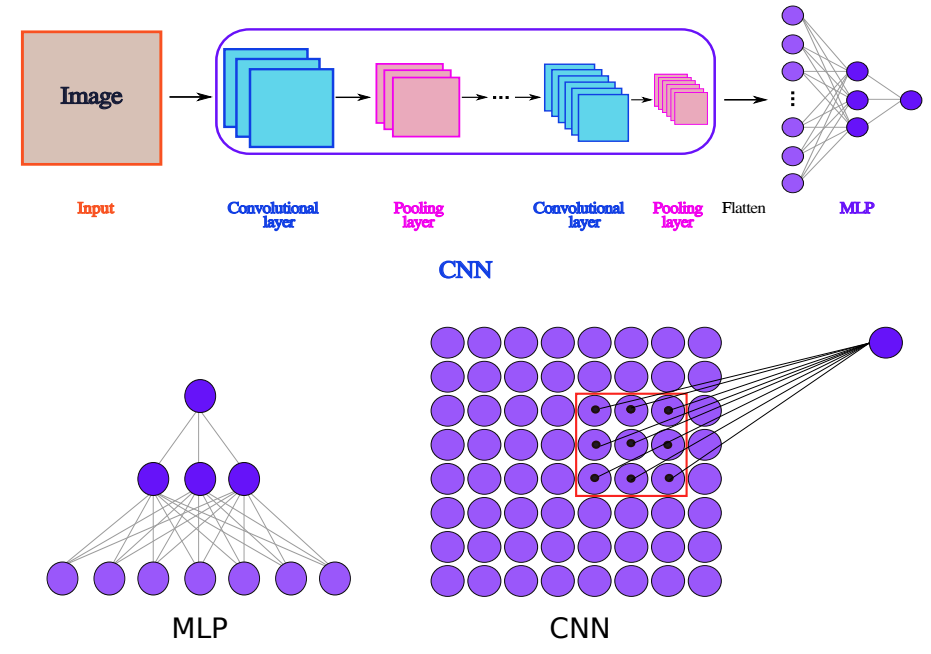

In [66]:
display(Image("figures/convolutional_layer.png"))

### LSTM

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) that effectively capture long-range dependencies in sequential data by addressing the vanishing gradient problem. They do this through a specially designed memory cell and gating mechanism. The LSTM architecture consists of the following key components:


#### Memory Cell

The memory cell is the core unit of the LSTM. It allows the LSTM to selectively retain or forget information across time steps.

#### Gates in LSTM

LSTMs have three main gates, each represented by a neural network layer with a sigmoid activation function $σ$, which squashes values between 0 and 1. These gates control the flow of information into, out of, and within the memory cell.


1. **Forget Gate**

The forget gate determines which information to discard from the cell state. It takes the current input $x_{t}$ and the previous hidden state $h_{t−1}$ as input, producing a vector of values between 0 (completely forget) and 1 (completely retain):

\begin{equation}
f_{t} = σ(W_{f} * [h_{t-1},x_{t}] + b_{f})
\end{equation}

$W_{f}$ are the weights and $b_{f}$ the bias of the computation. The brackets [] denote the concatenation.

2. **Input Gate**

The input gate decides which new information to add to the memory cell. It consists of a sigmoid gate that controls which values to update and a tanh layer that creates a candidate vector of new values.

\begin{equation}
i_{t} = σ(W_{i} * [h_{t-1},x_{t}] + b_{i}) \\
\hat{c}_{t} = tanh(W_{c} * [h_{t-1},x_{t}] + b_{c})
\end{equation}

The product of $i_{t}$ and $\hat{c}_{t}$ is the updated information to add to the cell.

3. **Output Gate**

The output gate determines the value of the next hidden state $(h_{t})$, which also serves as the output of the LSTM at the current time step. It uses a sigmoid gate to control the output and a tanh function to scale the cell state:

\begin{equation}
o_{t} = σ(W_{o} * [h_{t-1},x_{t}] + b_{o}) \\
h_{t} = o_{t} * tanh(c_{t})
\end{equation}

#### Cell State Update


The new cell state $c_{t}$ is calculated by combining the contributions from the forget gate and the input gate:

\begin{equation}
c_{t} = f_{t} * c_{t-1}  + i_{t} * \hat{c}_{t}
\end{equation}

Hence this equation ensures that the cell state can retain long-term dependencies while incorporating relevant new information.


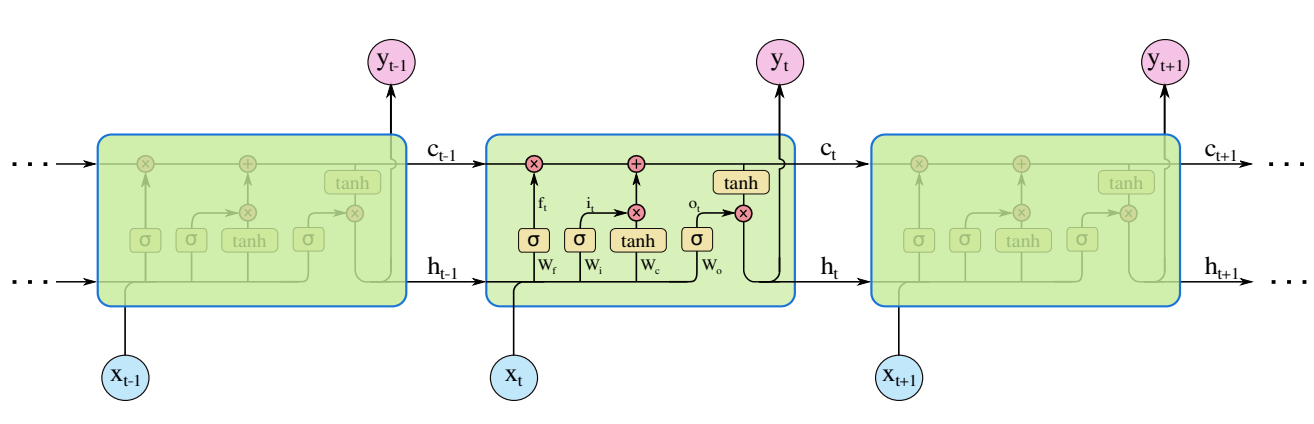

In [67]:
display(Image("figures/lstm.png"))

#### MXFold Architecture

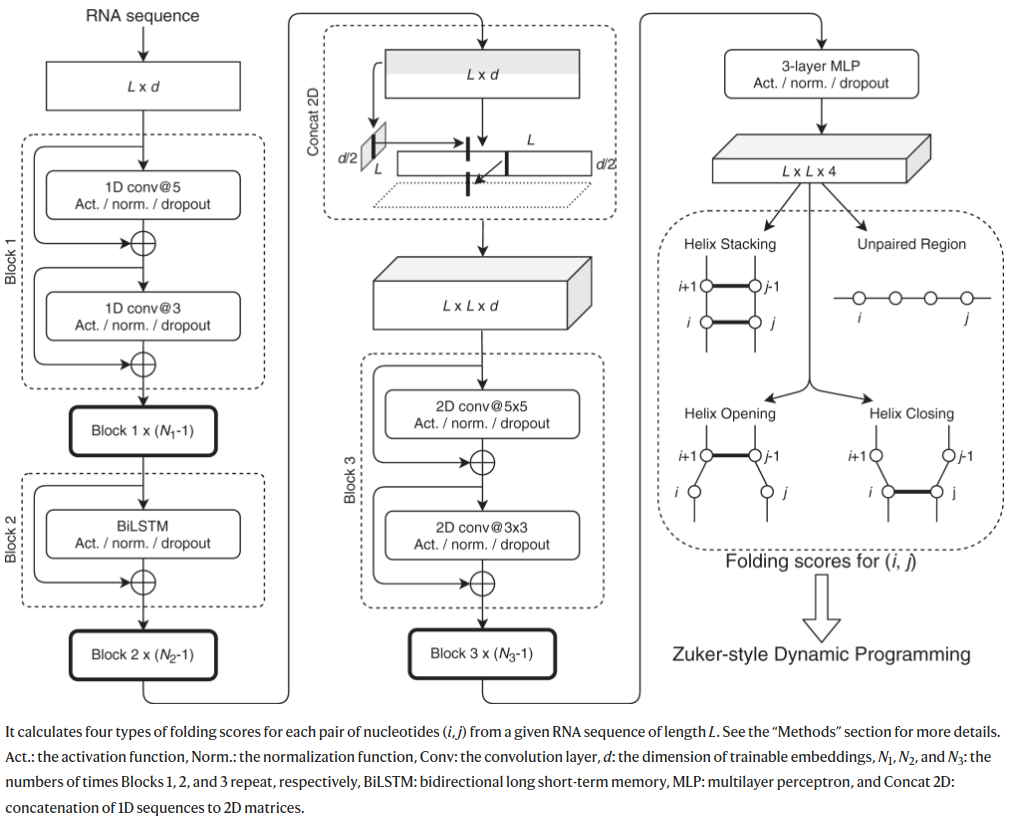

In [68]:
display(Image("figures/rnastructure2.png"))

#### 1. Four types of folding scores
- helix stacking
- helix opening
- helix closing
- unpaired region

#### 2. Network input and output
The input of the network is an RNA sequence of length L. Each base (A, C, G, or U) is encoded into d-dimensional embeddings using a trainable embedding function. The model calculates four types of folding scores for each pair of nucleotides in a given sequence: helix stacking, helix opening, helix closing, and unpaired region. 

#### 3. Embedding

A trainable embedding layer is used to convert the RNA sequence of lenght $L$, into a $Lxd$ dimensional  sequence embedding matrix. The embedding layer simply executes a lookup table for input values:

\begin{equation}
E = W[X]
\end{equation}
where $X$ a discrete values to loop up and $W$ is the $4*D$ dimensional look up matrix. 


#### 3. 1D Convolutions

The convolution operation involves sliding the kernel across the input, computing a weighted sum at each position, and producing a feature map that highlights specific patterns in the data. Convolutions are widely used in convolutional neural networks (CNNs), where they enable efficient feature extraction while preserving spatial relationships.

Here the embedding is entered into 1D convolution blocks, which is repeated $N_1$ times. Each 1D convolution block consists of two convolutional layers, with kernel sizes of 5 and 3, respectively, and a depth of $d$. Layer normalization and continuously differentiable exponential linear units (CELU) activation functions are employed. A dropout rate of 50% is used to avoid overfitting. To efficiently train deep neural networks, a residual connection that skips each layer is employed. This skip connection helps in dealing with vanishing gradients. 

##### Layer normalization

Layer Normalization (LayerNorm) is a normalization technique used in deep learning to improve training stability and convergence, particularly in models involving sequential or hierarchical structures. Each feature is normalized to have zero mean and unit variance:

\begin{equation}
\hat{x_i} = \frac{x_i - \mu }{\sqrt{\sigma^2 + \epsilon}}
\end{equation}

here $\hat{x_i}$ is the adapted feature, $x_i$ the input feature $\mu$ the mean of the features and $\sigma^2$ the variance.  The final output $y_i$ for $x_i$ is scaled with a learnable parameter $\gamma$ and bias  $\beta$.

\begin{equation}
y_i = \gamma * \hat{x}_{i} + \beta
\end{equation}


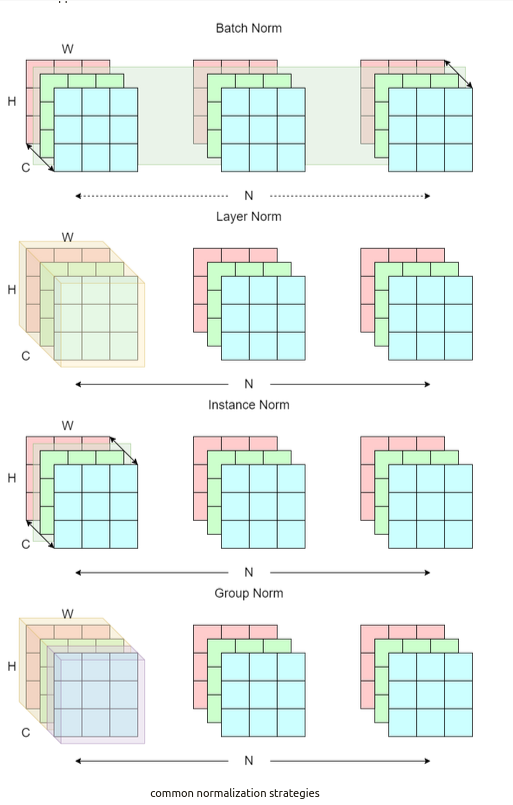





##### CELU (continuously differentiable exponential linear units)

Exponential Linear Units (ELUs) are often used to speed up learning by virtue of improving on the vanishing gradients problem. However, the ELU activation is not continuously differentiable with respect to its input when the shape parameter alpha is not equal to 1. CELU is an alternative function that is continuous for all values of alpha.  This alternative parametrization has several other useful properties that the original parametrization of ELU does not: 1) its derivative with respect to x is bounded, 2) it contains both the linear transfer function and ReLU as special cases, and 3) it is scale-similar with respect to alpha. 

\begin{equation}
CELU(x) = \max (0,x) + min (0, \alpha * (exp(x/\alpha)-1)) 
\end{equation}

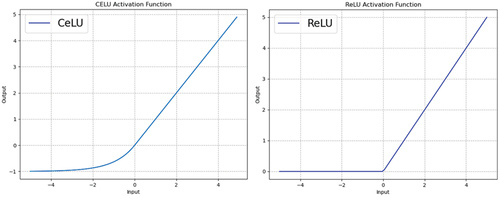

#### 4. BiLSTM

Long Short-Term Memory networks (LSTMs) are a type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data. They achieve this by using a gating mechanism to control the flow of information, selectively retaining or forgetting elements of the sequence as needed. An LSTM unit consists of three key gates: the forget gate, which determines what information to discard from the cell state; the input gate, which decides what new information to add; and the output gate, which determines the final output based on the current cell state. This structure allows LSTMs to mitigate the vanishing gradient problem, making them effective for tasks involving long-range dependencies, such as language modeling, time series prediction, or RNA sequence analysis.

Bidirectional LSTMs (Bi-LSTMs) extend LSTMs by processing the input sequence in both forward and backward directions. This bidirectional approach provides context from both past (preceding) and future (succeeding) elements of the sequence, making Bi-LSTMs particularly powerful for tasks where full context is important, such as sentiment analysis, speech recognition, or secondary structure prediction in RNA. By combining the outputs from both directions, Bi-LSTMs capture richer features and provide more nuanced insights compared to unidirectional LSTMs.


Block 2 contains $N2$ layers of the bidirectional long short-term memory (BiLSTM) network. The number of hidden units in each direction of the BiLSTM network is $d/2$. Each BiLSTM layer is followed by the layer normalization and CELU activation functions. A dropout rate of 50% is also used in BiLSTM layers.
The use of bidirectional LSTMs is intuitively sensible here, since information from both sides of the sequences is involved in determining the final secondary structure. 


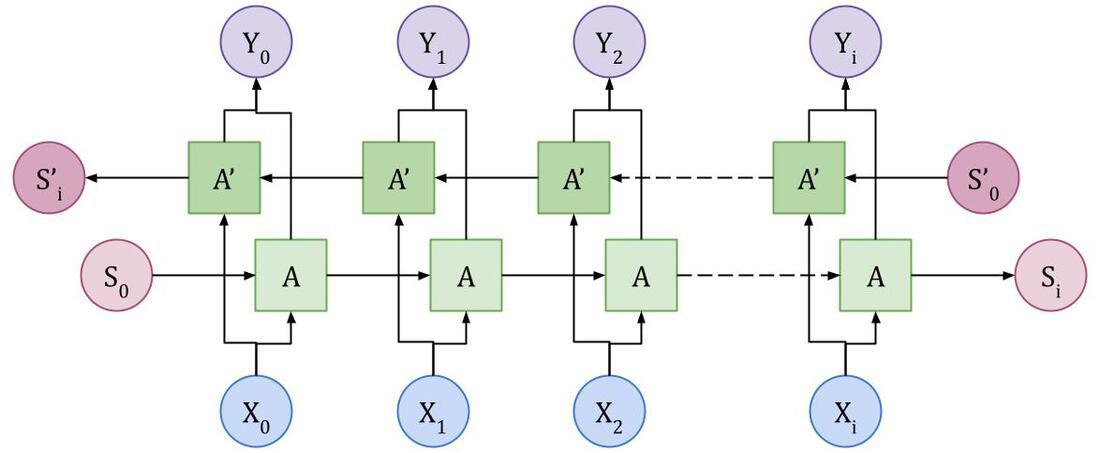

#### 5. Concat 2D operation

The Concat 2D operation merges the input along a specific axis. Here it is used to connect the computed embedding into a "grid", resembling the base-pairing probabilties in the final RNA structure. 

The $L × d$ matrix obtained so far is divided into two matrices of size $L × d/2$; one of the two matrices expands in the column direction and the other in the row direction, and then the two matrices are concatenated into an $L × L × d$ matrix, as shown in the “Concat 2D” operation


#### 6. 2D convolution
2D convolutions, on the other hand, are usually applied to image data or any two-dimensional grid-like structure, where the input has two dimensions (height and width). The filter slides in two directions, capturing spatial relationships and patterns such as edges, textures, or shapes in images. Here we use 2D convolutions to process the 2D representation of the base pairing probability, we previously created using 2D concat operation.

This matrix is entered into 2D convolution blocks  $N_3$ times. Each 2D convolution block consists of two convolutional layers, each with a kernel size of $5 × 5$ and $3 × 3$, respectively, and a depth of d. The layer normalization and CELU functions with a dropout rate of 50% are again utilized.



#### 7. Multi-layer perceptron
Four types of folding scores for each pair of i-th and j-th nucleotides are calculated by 3-layer multilayer perceptron (MLP) with h hidden units

#### Free engergy and nearest neighbour loops
Mxfold2 calculates the free energy of the nearest-neighbor loops using four types of folding scores computed by the deep neural network. The helix stacking scores characterize the stacking of base-pairs that mainly contributes to the thermodynamic stability of RNA structures. The helix opening scores and helix closing scores characterize each end of helix regions, corresponding to the terminal mismatch in Turner’s thermodynamic model. The unpaired region scores characterize unstructured sequences that contribute to the thermodynamic instability of RNA structures. Our algorithm calculates the folding score for a nearest-neighbor loop by summing up the four types of the scores comprising the loop.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNLayer(nn.Module):
    def __init__(self, n_in, num_filters=(128,), filter_size=(7,), pool_size=(1,), dilation=1, 
                 dropout_rate=0.0, resnet=False):
        super(CNNLayer, self).__init__()
        self.resnet = resnet
        self.net = nn.ModuleList()
        for n_out, ksize, p in zip(num_filters, filter_size, pool_size):
            self.net.append( 
                nn.Sequential( 
                    nn.Conv1d(n_in, n_out, kernel_size=ksize, dilation=2**dilation, 
                              padding=2**dilation*(ksize//2)),
                    nn.MaxPool1d(p, stride=1, padding=p//2) if p > 1 else nn.Identity(),
                    nn.GroupNorm(1, n_out),
                    nn.CELU(), 
                    nn.Dropout(p=dropout_rate) ) )
            n_in = n_out


    def forward(self, x): # (B=1, 4, N)
        for net in self.net:
            x_a = net(x)
            x = x + x_a if self.resnet and x.shape[1]==x_a.shape[1] else x_a
        return x


class CNNLSTMEncoder(nn.Module):
    def __init__(self, n_in, 
            num_filters=(256,), filter_size=(7,), pool_size=(1,), dilation=0,
            num_lstm_layers=0, num_lstm_units=0, num_att=0, dropout_rate=0.0, resnet=True):

        super(CNNLSTMEncoder, self).__init__()
        self.resnet = resnet
        self.n_in = self.n_out = n_in
        while len(num_filters) > len(filter_size):
            filter_size = tuple(filter_size) + (filter_size[-1],)
        while len(num_filters) > len(pool_size):
            pool_size = tuple(pool_size) + (pool_size[-1],)
        if num_lstm_layers == 0 and num_lstm_units > 0:
            num_lstm_layers = 1

        self.dropout = nn.Dropout(p=dropout_rate)
        self.conv = self.lstm = self.att = None

        if len(num_filters) > 0 and num_filters[0] > 0:
            self.conv = CNNLayer(n_in, num_filters, filter_size, pool_size, dilation, 
                                 dropout_rate=dropout_rate, resnet=self.resnet)
            self.n_out = n_in = num_filters[-1]

        if num_lstm_layers > 0:
            self.lstm = nn.LSTM(n_in, num_lstm_units, num_layers=num_lstm_layers, 
                                batch_first=True, bidirectional=True, 
                            dropout=dropout_rate if num_lstm_layers>1 else 0)
            self.n_out = n_in = num_lstm_units*2
            self.lstm_ln = nn.LayerNorm(self.n_out)

        if num_att > 0:
            self.att = nn.MultiheadAttention(self.n_out, num_att, dropout=dropout_rate)


    def forward(self, x): # (B, n_in, N)
        if self.conv is not None:
            x = self.conv(x) # (B, C, N)
        x = torch.transpose(x, 1, 2) # (B, N, C)

        if self.lstm is not None:
            x_a, _ = self.lstm(x)
            x_a = self.lstm_ln(x_a)
            x_a = self.dropout(F.celu(x_a)) # (B, N, H*2)
            x = x + x_a if self.resnet and x.shape[2]==x_a.shape[2] else x_a

        if self.att is not None:
            x = torch.transpose(x, 0, 1)
            x_a, _ = self.att(x, x, x)
            x = x + x_a
            x = torch.transpose(x, 0, 1)

        return x


In [ ]:
class PairedLayer(nn.Module):
    def __init__(self, n_in, n_out=1, filters=(), ksize=(), fc_layers=(), dropout_rate=0.0,
                 exclude_diag=True, resnet=True):
        super(PairedLayer, self).__init__()

        self.resnet = resnet        
        self.exclude_diag = exclude_diag
        while len(filters) > len(ksize):
            ksize = tuple(ksize) + (ksize[-1],)

        self.conv = nn.ModuleList()
        for m, k in zip(filters, ksize):
            self.conv.append(
                nn.Sequential( 
                    nn.Conv2d(n_in, m, k, padding=k//2), 
                    nn.GroupNorm(1, m),
                    nn.CELU(), 
                    nn.Dropout(p=dropout_rate) ) )
            n_in = m

        fc = []
        for m in fc_layers:
            fc += [
                nn.Linear(n_in, m), 
                nn.LayerNorm(m),
                nn.CELU(), 
                nn.Dropout(p=dropout_rate) ]
            n_in = m
        fc += [ nn.Linear(n_in, n_out) ]
        self.fc = nn.Sequential(*fc)


    def forward(self, x):
        diag = 1 if self.exclude_diag else 0
        B, N, _, C = x.shape
        x = x.permute(0, 3, 1, 2)
        x_u = torch.triu(x.view(B*C, N, N), diagonal=diag).view(B, C, N, N)
        x_l = torch.tril(x.view(B*C, N, N), diagonal=-1).view(B, C, N, N)
        x = torch.cat((x_u, x_l), dim=0).view(B*2, C, N, N)
        for conv in self.conv:
            x_a = conv(x)
            x = x + x_a if self.resnet and x.shape[1]==x_a.shape[1] else x_a # (B*2, n_out, N, N)
        x_u, x_l = torch.split(x, B, dim=0) # (B, n_out, N, N) * 2
        x_u = torch.triu(x_u.view(B, -1, N, N), diagonal=diag)
        x_l = torch.tril(x_u.view(B, -1, N, N), diagonal=-1)
        x = x_u + x_l # (B, n_out, N, N)
        x = x.permute(0, 2, 3, 1).view(B*N*N, -1)
        x = self.fc(x)
        return x.view(B, N, N, -1) # (B, N, N, n_out)


class UnpairedLayer(nn.Module):
    def __init__(self, n_in, n_out=1, filters=(), ksize=(), fc_layers=(), dropout_rate=0.0, resnet=True):
        super(UnpairedLayer, self).__init__()

        self.resnet = resnet
        while len(filters) > len(ksize):
            ksize = tuple(ksize) + (ksize[-1],)

        self.conv = nn.ModuleList()
        for m, k in zip(filters, ksize):
            self.conv.append(
                nn.Sequential(
                    nn.Conv1d(n_in, m, k, padding=k//2), 
                    nn.GroupNorm(1, m),
                    nn.CELU(), 
                    nn.Dropout(p=dropout_rate) ) )
            n_in = m

        fc = []
        for m in fc_layers:
            fc += [
                nn.Linear(n_in, m), 
                nn.LayerNorm(m),
                nn.CELU(), 
                nn.Dropout(p=dropout_rate)]
            n_in = m
        fc += [ nn.Linear(n_in, n_out) ] # , nn.LayerNorm(n_out) ]
        self.fc = nn.Sequential(*fc)


    def forward(self, x, x_base=None):
        B, N, C = x.shape
        x = x.transpose(1, 2) # (B, n_in, N)
        for conv in self.conv:
            x_a = conv(x)
            x = x + x_a if self.resnet and x.shape[1]==x_a.shape[1] else x_a
        x = x.transpose(1, 2).view(B*N, -1) # (B, N, n_out)
        x = self.fc(x)
        return x.view(B, N, -1)

In [6]:

class NeuralNet(nn.Module):
    def __init__(self, embed_size=0,
            num_filters=(96,), filter_size=(5,), dilation=0, pool_size=(1,), 
            num_lstm_layers=0, num_lstm_units=0, num_att=0, 
            num_transformer_layers=0, num_transformer_hidden_units=2048,
            num_transformer_att=8,
            no_split_lr=False, pair_join='cat',
            num_paired_filters=(), paired_filter_size=(),
            num_hidden_units=(32,), dropout_rate=0.0, fc_dropout_rate=0.0, 
            exclude_diag=True, n_out_paired_layers=0, n_out_unpaired_layers=0, **kwargs):

        super(NeuralNet, self).__init__()

        self.no_split_lr = no_split_lr
        self.pair_join = pair_join
        self.embedding = OneHotEmbedding() if embed_size == 0 else SparseEmbedding(embed_size)
        n_in = self.embedding.n_out

        if num_transformer_layers==0:
            self.encoder = CNNLSTMEncoder(n_in,
                num_filters=num_filters, filter_size=filter_size, pool_size=pool_size, 
                dilation=dilation, num_att=num_att,num_lstm_layers=num_lstm_layers, 
                                num_lstm_units=num_lstm_units, dropout_rate=dropout_rate)
        else:
            self.encoder = TransformerLayer(n_in, n_head=num_transformer_att, 
                            n_hidden=num_transformer_hidden_units, 
                            n_layers=num_transformer_layers, dropout=dropout_rate)
        n_in = self.encoder.n_out

        if self.pair_join != 'bilinear':
            self.transform2d = Transform2D(join=pair_join)

            n_in_paired = n_in // 2 if pair_join!='cat' else n_in
            if self.no_split_lr:
                n_in_paired *= 2

            self.fc_paired = PairedLayer(n_in_paired, n_out_paired_layers,
                                    filters=num_paired_filters, ksize=paired_filter_size,
                                    exclude_diag=exclude_diag,
                                    fc_layers=num_hidden_units, dropout_rate=fc_dropout_rate)
            if n_out_unpaired_layers > 0:
                self.fc_unpaired = UnpairedLayer(n_in, n_out_unpaired_layers,
                                        filters=num_paired_filters, ksize=paired_filter_size,
                                        fc_layers=num_hidden_units, dropout_rate=fc_dropout_rate)
            else:
                self.fc_unpaired = None

        else:
            n_in_paired = n_in // 2 if not self.no_split_lr else n_in
            self.bilinear = nn.Bilinear(n_in_paired, n_in_paired, n_out_paired_layers)
            self.linear = nn.Linear(n_in, n_out_unpaired_layers)


    def forward(self, seq):
        device = next(self.parameters()).device
        x = self.embedding(['0' + s for s in seq]).to(device) # (B, 4, N)
        x = self.encoder(x)

        if self.no_split_lr:
            x_l, x_r = x, x
        else:
            x_l = x[:, :, 0::2]
            x_r = x[:, :, 1::2]
        x_r = x_r[:, :, torch.arange(x_r.shape[-1]-1, -1, -1)] # reverse the last axis

        if self.pair_join != 'bilinear':
            x_lr = self.transform2d(x_l, x_r)

            score_paired = self.fc_paired(x_lr)
            if self.fc_unpaired is not None:
                score_unpaired = self.fc_unpaired(x)
            else:
                score_unpaired = None

            return score_paired, score_unpaired

        else:
            B, N, C = x_l.shape
            x_l = x_l.view(B, N, 1, C).expand(B, N, N, C).reshape(B*N*N, -1)
            x_r = x_r.view(B, 1, N, C).expand(B, N, N, C).reshape(B*N*N, -1)
            score_paired = self.bilinear(x_l, x_r).view(B, N, N, -1)
            score_unpaired = self.linear(x)

            return score_paired, score_unpaired

## Train the model

### A max-margin training of RNA secondary structure prediction integrated with the thermodynamic model

MXfold uses the max-margin method when training for RNA secondary structure prediction. 

Similar to traditional folding methods MXfold2 adopts the nearest-neighbor model as an RNA secondary structure model without pseudoknots. As an alternative to the thermodynamic parameters, our algorithm calculates the free energy of the nearest-neighbor loops using four types of folding scores computed by the deep neural network. The four types of the folding scores are helix stacking scores, helix opening scores, helix closing scores, and unpaired region scores. The helix stacking scores characterize the stacking of base-pairs that mainly contributes to the thermodynamic stability of RNA structures. The helix opening scores and helix closing scores characterize each end of helix regions, corresponding to the terminal mismatch in Turner’s thermodynamic model. 

The unpaired region scores characterize unstructured sequences that contribute to the thermodynamic instability of RNA structures. MXfold calculates the folding score for a nearest-neighbor loop by summing up the four types of the scores comprising the loop. For example, the folding score of the internal loop consisting of bases 25–29 and 43–47 is calculated by summing the helix closing score for (25, 47), the helix opening score for (28, 44), and the unpaired region scores for (26, 28) and (44, 46). Similarly, the folding score of the base-pair stacking consisting of 23–24 and 48–49 is calculated from the helix stacking score for (23, 49). 

For the final scoring function the calculated scores for the neural network $f_W(x,y)$ and the thermodynamic scores $f_T(x,y)$ are added up.

\begin{equation}
f(x,y) = f_T(x,y) + f_W(x,y)
\end{equation}


#### Preliminary

With $\Sigma = \{A,G,C,U\}$ being set of all nucleotides and $\Sigma^{*}$ all finite RNA sequences consisting of bases in $\Sigma$. For a sequence $x = x_1,x_2,...,x_n$, let $|x|$ be the number of bases in $x$. Let $S(x)$ be all possible secondary structures of $x$. A secondary structure can then be represented by a binary-valued triangular matrix of the shape $|x| * |x|$ with $y = (y_{ij})_{i<j}$, where $y_{ij} = 1$  if and only if bases $x_i$ and $x_j$ form a base-pair composed by hydrogen bonds including the Watson-Crick base-pairs (A-U and G-C), the Wobble base-pairs (G-U).


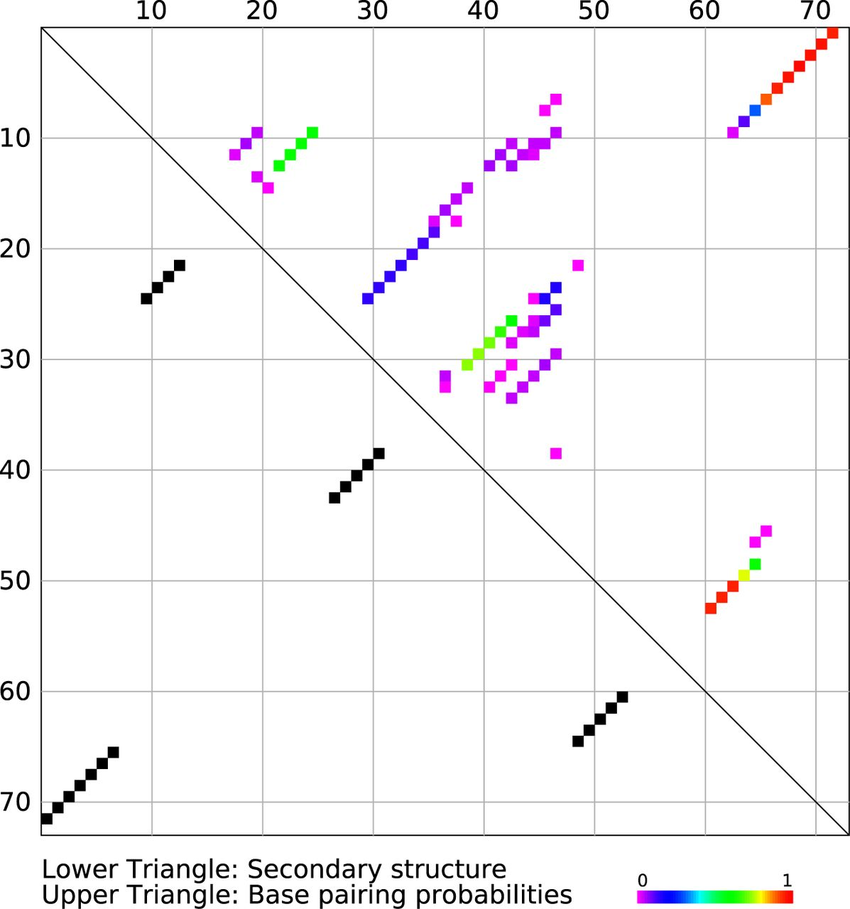

**Wobble base pairs**
Wobble base pairs are non-standard base pairings that occur between certain nucleotides in RNA, allowing for flexibility in base pairing beyond the canonical Watson-Crick pairs (A-U and G-C). The most common wobble base pair is between guanine (G) and uracil (U), where hydrogen bonding can still occur despite the mismatch. Wobble base pairing is crucial in biological processes, particularly during translation, where it allows tRNA molecules to recognize multiple codons through fewer anticodons, thereby increasing the efficiency and versatility of the genetic code.

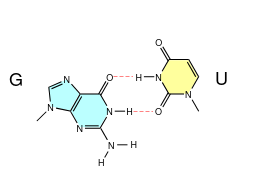

#### Scoring Model


The scoring model $f(x,y)$ assigns real-valued scores to an RNA secondary structure $y \in S(x)$ for an RNA sequence $x\in\Sigma^{*}$. The goal is the to find a secondary structure that maximizes the socring function.

RNA secondary structures can be decomposed into characteristic substructures, or features, such as hairpin loops and base-pair stacking.

We describe with $\Phi (x,y)$ the feature representation vector of $(x,y)$, which consists of the number of occurrence of every feature in $(x,y)$. Each feature is then associated with a corresponding weight:

\begin{equation}
f(x,y) = \lambda^{T} \Phi (x,y) 
\end{equation}

where $\lambda$ is a weight vector.

**Note that the thermodynamic approach can be represented by this linear scoring model if we define Φ as the nearest neighbor model and the corresponding weights as the negative of experimentally determined free energy parameters.**

The scoring model used here now integrates thermodynamic approach and the machine learning based weighted approach. The scoring model is:

\begin{equation}
f(x,y) = f_T(x,y) + f_W(x,y),\\
f_T(x,y) = \lambda_T^T  \Phi_T (x,y),\\
f_W(x,y) = \lambda_W^T  \Phi_W (x,y),\\
\end{equation}

where the contribution of the thermodynamic model is $f_T$ and $f_W$ the contribution of the machine learning model. For the thermodynamic model, we employ the nearest neighbor model as $\Phi_T$ and
the negative of the Turner free energy parameters as $\lambda_T$ . For the machine learning model, we construct a fine-grained model as $\Phi_W$ and corresponding weights $\lambda_W$ that are trainable from training data by using SSVM.

#### Decoding algorithm

Since both $\Phi_T$ and $\Phi_W$ are based on the nearest neighbor model, any secondary structures can be decomposed into the same substructures for both representations. Therefore, we can find the most probable secondary structure that maximizes the objective function by the Zuker-style dynamic programming algorithm.

## Using SSVM (structured support vector machines) to learn weights

### Differences Between Standard SVMs and Structured SVMs.

Structured Support Vector Machines (Structured SVMs) are an extension of standard Support Vector Machines (SVMs) designed to handle structured outputs. Unlike standard SVMs, which classify data into discrete classes (e.g., "cat" vs. "dog"), Structured SVMs predict complex outputs.

| **Feature** | **SVM** | **structured SVM** |
| --- | --- | --- |
| **Output Type** | Binary or multiclass labels | Complex, structured outputs (e.g., sequences, trees, graphs) |
| **Loss Function** | e.g. Hinge loss | e.g. Structured hinge loss|
| **Prediction Task** | Simple classification | Structured prediction |
| **Output Type** | Maximizes margin for independent classes | Maximizes margin for structured outputs |


To model the relationship between $x$ and $y$, a joint feature representation is needed: $\Phi (x,y)$.

The SSVM defines a scoring function $f(x,y)$ to evaluate how well an output $y$ matches an input $x$:

\begin{equation}
f(x,y) = ⟨\lambda , \Phi (x,y)⟩
\end{equation}

This computes the weight vector $\lambda$ determining the weight of each feature in the feature vector. Here $⟨⋅,⋅⟩$ denotes the dot-product. 


To ensure the model learns to predict correct outputs, SSVMs use a structured hinge loss. This loss ensures the correct output $y$ scores higher than incorrect outputs $y′$, with a margin proportional to their loss $\Delta(y,y′)$.

\begin{equation}
Loss = max_{y \in Y}(0,\Delta (y,y') +f(x,y')) -f(x,y)
\end{equation}

with $y$ being the ground truth, $x$ the input, $y'$ the models prediction and $\Delta (y,y')$ being a task specific loss, that compares the prediction with the ground truth. The model now maximizes the function $f$ for the true output as well as the margin for $f$ between the true output and all incorrect outputs.
This loss together with regularization paramter can now be trained using a gradient-based approach.

The final output $\hat{y}$ is computated as: $\hat{y}=$ argma$x_⁡{y\in Y} f(x,y)$
where Y is the set of all possible structured outputs. 

Since the number of possible structures might be very large here **dynamic programming** can be used. 



#### Learning algorithm
To optimize the parameters , the model uses a max-margin framework called structured support vector machines (SSVM). 

Given a training dataset $D = \{x^{k}, y^{k}\}^{K}_{k=1}$ where $x^{k}$ is the k-th RNA sequence and $y^{k}$ it's reference structure, the goal is finding a weight vector \lambda_{W} that minimized the loss:

\begin{equation}
L(\lambda) = \sum_{(x,y) \in D} \{(max_{\hat{y} \in S(x)} [f(x, \hat{y}) + \delta (y,\hat{y})] - f(x,y) ) + C_{1} [f(x,y) - f_{t}(x,y)]^2 + C_{2} ||x||_{2}\}
\end{equation}


Here S(x) is the set of all possible secondary structures of the sequence. The first term is the structured hinge-loss function. Here $\Delta$ denotes the margin defined as:

$\Delta (y, y_{hat}) = \delta^{FN}*$ (# of false negative base pairs) + $\delta^{FP}*$  (# of false-positive base pairs)

where $\delta^{FP}$ and $\delta^{FN}$ are tunable hyperparameters that control the trade-off between sensitivity and specificity for learning the parameters.The margin term for structured models enables robust predictions by
maximizing the margin between $f(x,y)$ and $f(x,y_{hat})$. The first term is calculated using Zuker-style dynamic programming. The second term consists of regluarization terms, that penalize parameter values that are extreme relative to a postulated distribution. This term is the proposed thermodynamic regularization, which prevents the
folding score of the secondary structure from differing significantly from the free energy of the thermodynamic parameters. The third term is the $l_{2}$ regularization parameter. Bot $C_{1}$ and $C_{2}$ are hyperparamter that influence the extend of the regularizaiton. 


### Loss function Implementation

In [4]:
class StructuredLoss(nn.Module):
    def __init__(self, model, loss_pos_paired=0, loss_neg_paired=0, loss_pos_unpaired=0, loss_neg_unpaired=0, 
                l1_weight=0., l2_weight=0., verbose=False):
        super(StructuredLoss, self).__init__()
        self.model = model
        self.loss_pos_paired = loss_pos_paired
        self.loss_neg_paired = loss_neg_paired
        self.loss_pos_unpaired = loss_pos_unpaired
        self.loss_neg_unpaired = loss_neg_unpaired
        self.l1_weight = l1_weight
        self.l2_weight = l2_weight
        self.verbose = verbose


    def forward(self, seq, pairs, fname=None):
        pred, pred_s, _, param = self.model(seq, return_param=True, reference=pairs,
                                loss_pos_paired=self.loss_pos_paired, loss_neg_paired=self.loss_neg_paired, 
                                loss_pos_unpaired=self.loss_pos_unpaired, 
                                loss_neg_unpaired=self.loss_neg_unpaired)
        ref, ref_s, _ = self.model(seq, param=param, constraint=pairs, 
                                   max_internal_length=None)
        l = torch.tensor([len(s) for s in seq], device=pred.device)
        loss = (pred - ref) / l
        if self.verbose:
            print("Loss = {} = ({} - {})".format(loss.item(), pred.item(), ref.item()))
            print(seq)
            print(pred_s)
            print(ref_s)
        if loss.item()> 1e10 or torch.isnan(loss):
            print()
            print(fname)
            print(loss.item(), pred.item(), ref.item())
            print(seq)

        if self.l1_weight > 0.0:
            for p in self.model.parameters():
                loss += self.l1_weight * torch.sum(torch.abs(p))

        # if self.l2_weight > 0.0:
        #     l2_reg = 0.0
        #     for p in self.model.parameters():
        #         l2_reg += torch.sum((self.l2_weight * p) ** 2)
        #     loss += torch.sqrt(l2_reg)

        return loss


class StructuredLossWithTurner(nn.Module):
    def __init__(self, model, loss_pos_paired=0, loss_neg_paired=0, loss_pos_unpaired=0, loss_neg_unpaired=0, 
                l1_weight=0., l2_weight=0., sl_weight=1., verbose=False):
        super(StructuredLossWithTurner, self).__init__()
        self.model = model
        self.loss_pos_paired = loss_pos_paired
        self.loss_neg_paired = loss_neg_paired
        self.loss_pos_unpaired = loss_pos_unpaired
        self.loss_neg_unpaired = loss_neg_unpaired
        self.l1_weight = l1_weight
        self.l2_weight = l2_weight
        self.sl_weight = sl_weight
        self.verbose = verbose
        from .fold.rnafold import RNAFold
        from . import param_turner2004
        if getattr(self.model, "turner", None):
            self.turner = self.model.turner
        else:
            self.turner = RNAFold(param_turner2004).to(next(self.model.parameters()).device)


    def forward(self, seq, pairs, fname=None):
        pred, pred_s, _, param = self.model(seq, return_param=True, reference=pairs,
                                loss_pos_paired=self.loss_pos_paired, loss_neg_paired=self.loss_neg_paired, 
                                loss_pos_unpaired=self.loss_pos_unpaired, 
                                loss_neg_unpaired=self.loss_neg_unpaired)
        ref, ref_s, _ = self.model(seq, param=param, constraint=pairs, max_internal_length=None)
        with torch.no_grad():
            ref2, ref2_s, _ = self.turner(seq, constraint=pairs, max_internal_length=None)
        l = torch.tensor([len(s) for s in seq], device=pred.device)
        loss = (pred - ref) / l
        loss += self.sl_weight * (ref-ref2) * (ref-ref2) / l
        if self.verbose:
            print("Loss = {} = ({} - {})".format(loss.item(), pred.item(), ref.item()))
            print(seq)
            print(pred_s)
            print(ref_s)
        if loss.item()> 1e10 or torch.isnan(loss):
            print()
            print(fname)
            print(loss.item(), pred.item(), ref.item())
            print(seq)

        if self.l1_weight > 0.0:
            for p in self.model.parameters():
                loss += self.l1_weight * torch.sum(torch.abs(p))

        # if self.l2_weight > 0.0:
        #     l2_reg = 0.0
        #     for p in self.model.parameters():
        #         l2_reg += torch.sum((self.l2_weight * p) ** 2)
        #     loss += torch.sqrt(l2_reg)

        return loss

In [83]:
%cd mxfold/mxfold2

/home/ubuntu/data/mlls/2024/machine_learning_in_life_science/lectures/5_rna_structure_rnn/mxfold/mxfold2


In [ ]:
%%bash
mxfold2 train --model MixC --param model_new.pth --save-config model.conf data/TrainSetA.lst --epochs 1

 37%|███▋      | 1179/3166 [06:52<14:06,  2.35it/s, train_loss=1.531e-01]

#### Final performance measure


We evaluated the accuracy of predicting RNA secondary structures through the positive predictive value (PPV) and the sensitivity (SEN) of the base pairs, defined as

\begin{equation}
PPV = \frac{TP}{TP+FP}
\end{equation}


\begin{equation}
SEN = \frac{TP}{TP+TN}
\end{equation}


with $TP$ being true-positive BP classification and $TN$ True negative BP classifcation and $FP$ false positive BP classifcation. The harmonic mean between both defines the F-value. Alternatively the root mean square error based on the free energy can be used.